## Task 2 - Model Building and Training 
Data Preparation:
Feature and Target Separation [‘Class’(creditcard), ‘class’(Fraud_Data)]
Train-Test Split 
Model Selection
Use several models to compare performance, including:
Logistic Regression
Decision Tree
Random Forest
Gradient Boosting
Multi-Layer Perceptron (MLP)
Convolutional Neural Network (CNN)
Recurrent Neural Network (RNN)
Long Short-Term Memory (LSTM)
Model Training and Evaluation
Training models for both credit card and fraud-data datasets.
MLOps Steps
Versioning and Experiment Tracking
Use tools like MLflow to track experiments, log parameters, metrics, and version models.


In [1]:
from data_analysis_and_preprocessing import load_data
from sklearn.model_selection import train_test_split
import pandas as pd
from model_building import train_model
from model_building import visualize
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from model_building import visualize_random_forest_predictions
from model_building import save_the_model

<Figure size 640x480 with 0 Axes>

step 1 : Data preparation

In [2]:
Fraud_data=load_data(r'C:\Users\ASUS VIVO\Desktop\e-commerce\Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions\data\data\Fraud_data_1.csv')
creditcard=load_data(r'C:\Users\ASUS VIVO\Desktop\e-commerce\Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions\data\data\creditcard_final.csv')




In [3]:
Fraud_data.head()

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M
0,0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,0.172414,QVPSPJUOCKZAR,0.362069,7.327584e+08,0,False,False,True,True,False,False,False,False,False,True
1,1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,0.048276,EOGFQPIZPYXFZ,0.603448,3.503114e+08,0,True,False,False,True,False,False,False,False,True,False
2,2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,0.041379,YSSKYOSJHPPLJ,0.603448,2.621474e+09,1,False,False,True,False,False,False,True,False,False,True
3,3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,0.241379,ATGTXKYKUDUQN,0.396552,3.840542e+09,0,False,False,True,False,False,False,False,True,False,True
4,4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,0.206897,NAUITBZFJKHWW,0.465517,4.155831e+08,0,True,False,False,False,False,False,False,True,False,True


In [4]:
list=['signup_time','purchase_time']
for column in list:
 Fraud_data[column]=pd.to_datetime(Fraud_data[column])
 

In [5]:
X_Fraud_data=Fraud_data.drop(['class','signup_time','purchase_time','device_id'],axis=1)
Y_Fraud_data=Fraud_data['class']
X_creditcard=creditcard.drop('Class',axis=1)
Y_creditcard=creditcard['Class']

step 2: split data

In [6]:
Fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Unnamed: 0       151112 non-null  int64         
 1   user_id          151112 non-null  int64         
 2   signup_time      151112 non-null  datetime64[ns]
 3   purchase_time    151112 non-null  datetime64[ns]
 4   purchase_value   151112 non-null  float64       
 5   device_id        151112 non-null  object        
 6   age              151112 non-null  float64       
 7   ip_address       151112 non-null  float64       
 8   class            151112 non-null  int64         
 9   source_Ads       151112 non-null  bool          
 10  source_Direct    151112 non-null  bool          
 11  source_SEO       151112 non-null  bool          
 12  browser_Chrome   151112 non-null  bool          
 13  browser_FireFox  151112 non-null  bool          
 14  browser_IE       151

In [7]:

X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = train_test_split(X_Fraud_data, Y_Fraud_data, test_size=0.2, random_state=42)

X_train_creditcard, X_test_creditcard, y_train_creditcard, y_test_creditcard = train_test_split(X_creditcard, Y_creditcard, test_size=0.2, random_state=42)

step 3: model selection

In [8]:
print(train_model(LogisticRegression(),'Fraud_data',X_train_fraud,y_train_fraud,X_test_fraud,y_test_fraud))
print(train_model(DecisionTreeClassifier(class_weight='balanced'),'Fraud_data',X_train_fraud,y_train_fraud,X_test_fraud,y_test_fraud))
print(train_model(RandomForestClassifier(class_weight='balanced'),'Fraud_data',X_train_fraud,y_train_fraud,X_test_fraud,y_test_fraud))
print(train_model(GradientBoostingClassifier(),'Fraud_data',X_train_fraud,y_train_fraud,X_test_fraud,y_test_fraud))
print(train_model(MLPClassifier(max_iter=1000),'Fraud_data',X_train_fraud,y_train_fraud,X_test_fraud,y_test_fraud))
print(train_model(DecisionTreeClassifier(class_weight='balanced'),'Fraud_data',X_train_fraud,y_train_fraud,X_test_fraud,y_test_fraud))

Fraud_data accuracy in LogisticRegression() is : 0.9057009562253913
Fraud_data accuracy in DecisionTreeClassifier(class_weight='balanced') is : 0.8914072064321874
Fraud_data accuracy in RandomForestClassifier(class_weight='balanced') is : 0.9225755219534791
Fraud_data accuracy in GradientBoostingClassifier() is : 0.9055355193064885
Fraud_data accuracy in MLPClassifier(max_iter=1000) is : 0.9057009562253913
Fraud_data accuracy in DecisionTreeClassifier(class_weight='balanced') is : 0.8904145849187705


so RandomForestClassifier is best option for Fraud_data

In [9]:
print(train_model(LogisticRegression(),'creditcard',X_train_creditcard,y_train_creditcard,X_test_creditcard,y_test_creditcard))
print(train_model(DecisionTreeClassifier(class_weight='balanced'),'creditcard',X_train_creditcard,y_train_creditcard,X_test_creditcard,y_test_creditcard))
print(train_model(RandomForestClassifier(class_weight='balanced'),'creditcard',X_train_creditcard,y_train_creditcard,X_test_creditcard,y_test_creditcard))
print(train_model(GradientBoostingClassifier(),'creditcard',X_train_creditcard,y_train_creditcard,X_test_creditcard,y_test_creditcard))
print(train_model(MLPClassifier(max_iter=1000),'creditcard',X_train_creditcard,y_train_creditcard,X_test_creditcard,y_test_creditcard))
print(train_model(DecisionTreeClassifier(class_weight='balanced'),'creditcard',X_train_creditcard,y_train_creditcard,X_test_creditcard,y_test_creditcard))

c:\Users\ASUS VIVO\.conda\envs\me\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


creditcard accuracy in LogisticRegression() is : 0.9990519995786665
creditcard accuracy in DecisionTreeClassifier(class_weight='balanced') is : 0.9990519995786665
creditcard accuracy in RandomForestClassifier(class_weight='balanced') is : 0.9995259997893332
creditcard accuracy in GradientBoostingClassifier() is : 0.9989466661985184
creditcard accuracy in MLPClassifier(max_iter=1000) is : 0.9982093325374811
creditcard accuracy in DecisionTreeClassifier(class_weight='balanced') is : 0.9990871107053826


RandomForestClassifier is the best alogorithm for both data b/c of high accuracy

Accuracy for Fraud Data: 0.92
Accuracy for Credit Card Data: 1.00


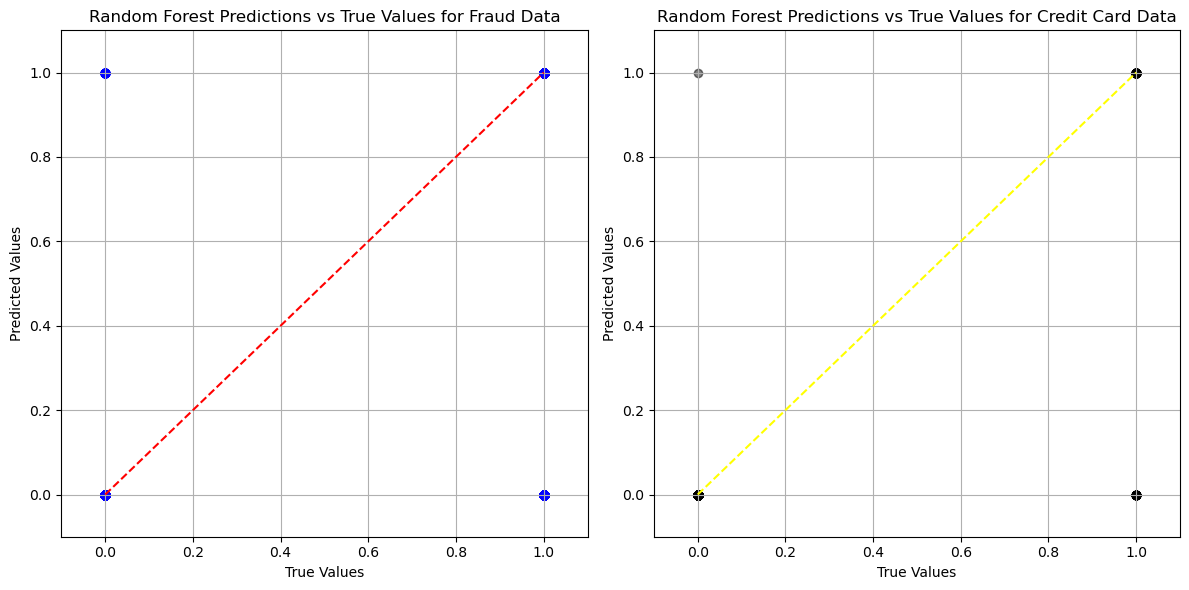

In [10]:
visualize_random_forest_predictions(X_train_fraud, y_train_fraud, X_test_fraud, y_test_fraud,
                                     X_train_creditcard, y_train_creditcard, X_test_creditcard, y_test_creditcard)

save the model

In [ ]:
output_directory = r'C:\Users\ASUS VIVO\Desktop\e-commerce\Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions\model'
save_the_model(X_train_fraud, y_train_fraud, X_train_creditcard, y_train_creditcard, output_directory)

Models saved successfully.
